In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gc
import seaborn as sns
import plotly.express as px

gc.enable()

from PIL import Image

In [2]:
dataframe = pd.read_csv("articles.csv")
dataframe_shape = dataframe.shape
dataframe.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [3]:
print(dataframe_shape)

(105542, 25)


In [4]:
print(dataframe.dtypes)

article_id                       int64
product_code                     int64
prod_name                       object
product_type_no                  int64
product_type_name               object
product_group_name              object
graphical_appearance_no          int64
graphical_appearance_name       object
colour_group_code                int64
colour_group_name               object
perceived_colour_value_id        int64
perceived_colour_value_name     object
perceived_colour_master_id       int64
perceived_colour_master_name    object
department_no                    int64
department_name                 object
index_code                      object
index_name                      object
index_group_no                   int64
index_group_name                object
section_no                       int64
section_name                    object
garment_group_no                 int64
garment_group_name              object
detail_desc                     object
dtype: object


In [5]:
unique_count = len(dataframe['detail_desc'].unique())
print(unique_count)

43405


In [6]:
dataframe.drop_duplicates()
dataframe['detail_desc'] = dataframe['detail_desc'].str.strip().str.lower()

In [7]:
dataframe['article_tags'] = dataframe['detail_desc'].str.split(' ')


In [8]:
dataframe['garment_group_name'] = dataframe['garment_group_name'].astype(str)
dataframe['garment_group_no'] = dataframe['garment_group_no'].astype(str)
dataframe['garment_group'] = dataframe['garment_group_name'] + '-' + dataframe['garment_group_no']

dataframe['section_name'] = dataframe['section_name'].astype(str)
dataframe['section_no'] = dataframe['section_no'].astype(str)
dataframe['section'] = dataframe['section_name'] + '-' + dataframe['section_no']

dataframe['index_group_name'] = dataframe['index_group_name'].astype(str)
dataframe['index_group_no'] = dataframe['index_group_no'].astype(str)
dataframe['index_group'] = dataframe['index_group_name'] + '-' + dataframe['index_group_no']

dataframe['index_name'] = dataframe['index_name'].astype(str)
dataframe['index_code'] = dataframe['index_code'].astype(str)
dataframe['index'] = dataframe['index_name'] + '-' + dataframe['index_code']



In [9]:
dataframe.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,section_no,section_name,garment_group_no,garment_group_name,detail_desc,article_tags,garment_group,section,index_group,index
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,16,Womens Everyday Basics,1002,Jersey Basic,jersey top with narrow shoulder straps.,"[jersey, top, with, narrow, shoulder, straps.]",Jersey Basic-1002,Womens Everyday Basics-16,Ladieswear-1,Ladieswear-A
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,16,Womens Everyday Basics,1002,Jersey Basic,jersey top with narrow shoulder straps.,"[jersey, top, with, narrow, shoulder, straps.]",Jersey Basic-1002,Womens Everyday Basics-16,Ladieswear-1,Ladieswear-A
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,16,Womens Everyday Basics,1002,Jersey Basic,jersey top with narrow shoulder straps.,"[jersey, top, with, narrow, shoulder, straps.]",Jersey Basic-1002,Womens Everyday Basics-16,Ladieswear-1,Ladieswear-A
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,61,Womens Lingerie,1017,"Under-, Nightwear","microfibre t-shirt bra with underwired, moulde...","[microfibre, t-shirt, bra, with, underwired,, ...","Under-, Nightwear-1017",Womens Lingerie-61,Ladieswear-1,Lingeries/Tights-B
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,61,Womens Lingerie,1017,"Under-, Nightwear","microfibre t-shirt bra with underwired, moulde...","[microfibre, t-shirt, bra, with, underwired,, ...","Under-, Nightwear-1017",Womens Lingerie-61,Ladieswear-1,Lingeries/Tights-B


In [10]:
dataframe = dataframe.drop(columns=['product_code'])

In [11]:
dataframe2 = pd.read_csv("customers.csv")
dataframe_shape2 = dataframe2.shape
dataframe2.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [12]:
bins = [20, 40, 60, 80, 100]
labels = ['teenage', 'middle-age', 'old', 'super seniors']

# Create a new 'age_group' column
dataframe2['age_group'] = pd.cut(dataframe2['age'], bins=bins, labels=labels)
dataframe2.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,middle-age
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,teenage
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,teenage
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,middle-age
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,middle-age


In [13]:
unique_count = (dataframe2['fashion_news_frequency'].unique())
print(unique_count)
#df = pd.get_dummies(df, columns=['categorical_column'])

['NONE' 'Regularly' nan 'Monthly']


In [14]:
print(dataframe_shape2)

(1371980, 7)


In [15]:
dataframe2.drop_duplicates()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,middle-age
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,teenage
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,teenage
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,middle-age
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,middle-age
...,...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...,teenage
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...,teenage
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...,teenage
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...,NaN


In [16]:
dataframe2['FN'] = dataframe2['FN'].fillna(0)
dataframe2['Active'] = dataframe2['Active'].fillna(0)
dataframe2.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,middle-age
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,teenage
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,teenage
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,middle-age
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,middle-age


In [17]:

dataframe2['fashion_news_frequency'] = dataframe2['fashion_news_frequency'].replace('nan', 'None')

In [18]:
dataframe2.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,age_group
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,middle-age
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,teenage
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,teenage
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,middle-age
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,middle-age


In [19]:
dataframe4 = pd.read_csv("transactions_train.csv")
dataframe_shape4 = dataframe4.shape
dataframe4.head()
column_data_types4 = dataframe4.dtypes

In [20]:
print(dataframe_shape4)

(31788324, 5)


In [21]:
print(column_data_types4)

t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object


In [22]:
dataframe4.drop_duplicates()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [23]:
tf_dataframe4 = dataframe4.isna()
rows_with_true = tf_dataframe4[tf_dataframe4.any(axis=1)]
print(rows_with_true)

Empty DataFrame
Columns: [t_dat, customer_id, article_id, price, sales_channel_id]
Index: []


In [24]:
dataframe4['t_dat'] = pd.to_datetime(dataframe4['t_dat'])
dataframe4['month'] = dataframe4['t_dat'].dt.month

In [25]:
dataframe4.head()

,t_dat,customer_id,article_id,price,sales_channel_id,month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,9
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,9
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,9
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,9
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,9


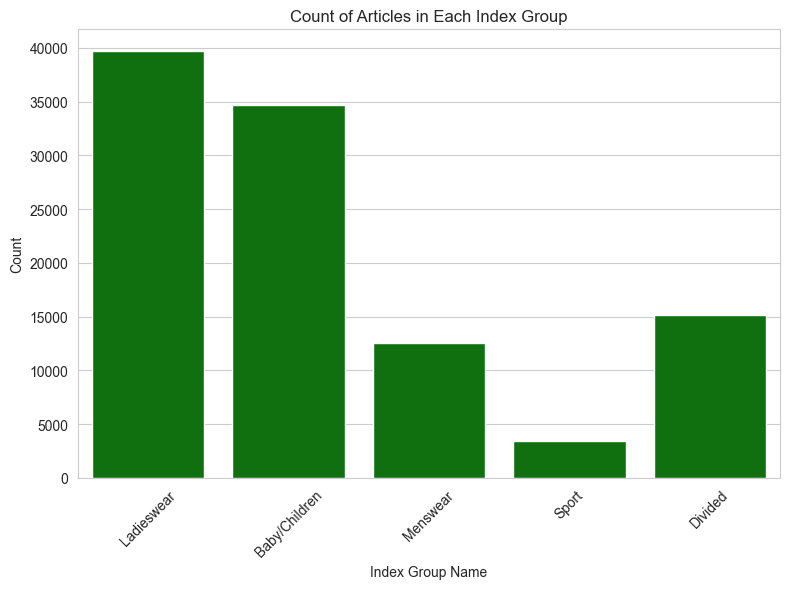

In [26]:


# Read the articles data
articles_df = pd.read_csv("articles.csv")

# Set the style to whitegrid and change the color of the countplot to green
sns.set_style("whitegrid")

# Define a smaller figure size
plt.figure(figsize=(8, 6))

# Create the countplot with green color
sns.countplot(data=articles_df, x='index_group_name', color='green')

# Customize the plot with a title, labels, and other options
plt.title("Count of Articles in Each Index Group")
plt.xlabel("Index Group Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()  # Ensure the plot fits nicely
plt.show()



In [27]:
print(articles_df[articles_df['index_group_no'] == 1]['index_group_name'].unique())
print(articles_df[articles_df['index_group_no'] == 2]['index_group_name'].unique())
print(articles_df[articles_df['index_group_no'] == 3]['index_group_name'].unique())
print(articles_df[articles_df['index_group_no'] == 4]['index_group_name'].unique())
print(articles_df[articles_df['index_group_no'] == 26]['index_group_name'].unique())

['Ladieswear']
['Divided']
['Menswear']
['Baby/Children']
['Sport']


/var/folders/76/z6fkh75x5_16fp8ljk6tsqzh0000gn/T/ipykernel_6589/265863021.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)  # Rotate x-axis labels


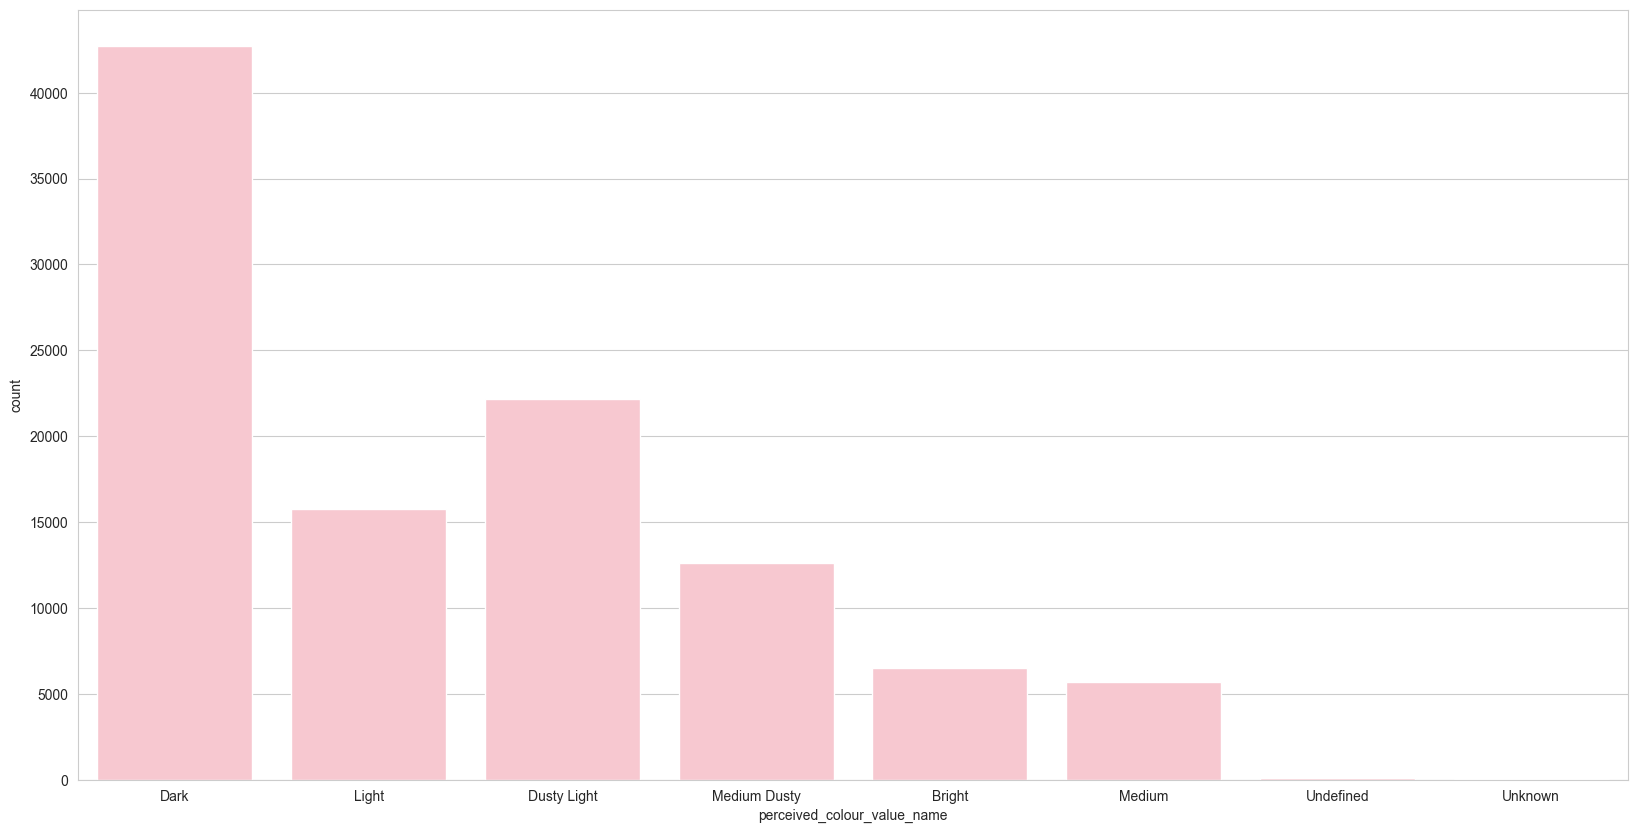

/var/folders/76/z6fkh75x5_16fp8ljk6tsqzh0000gn/T/ipykernel_6589/265863021.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)  # Rotate x-axis labels


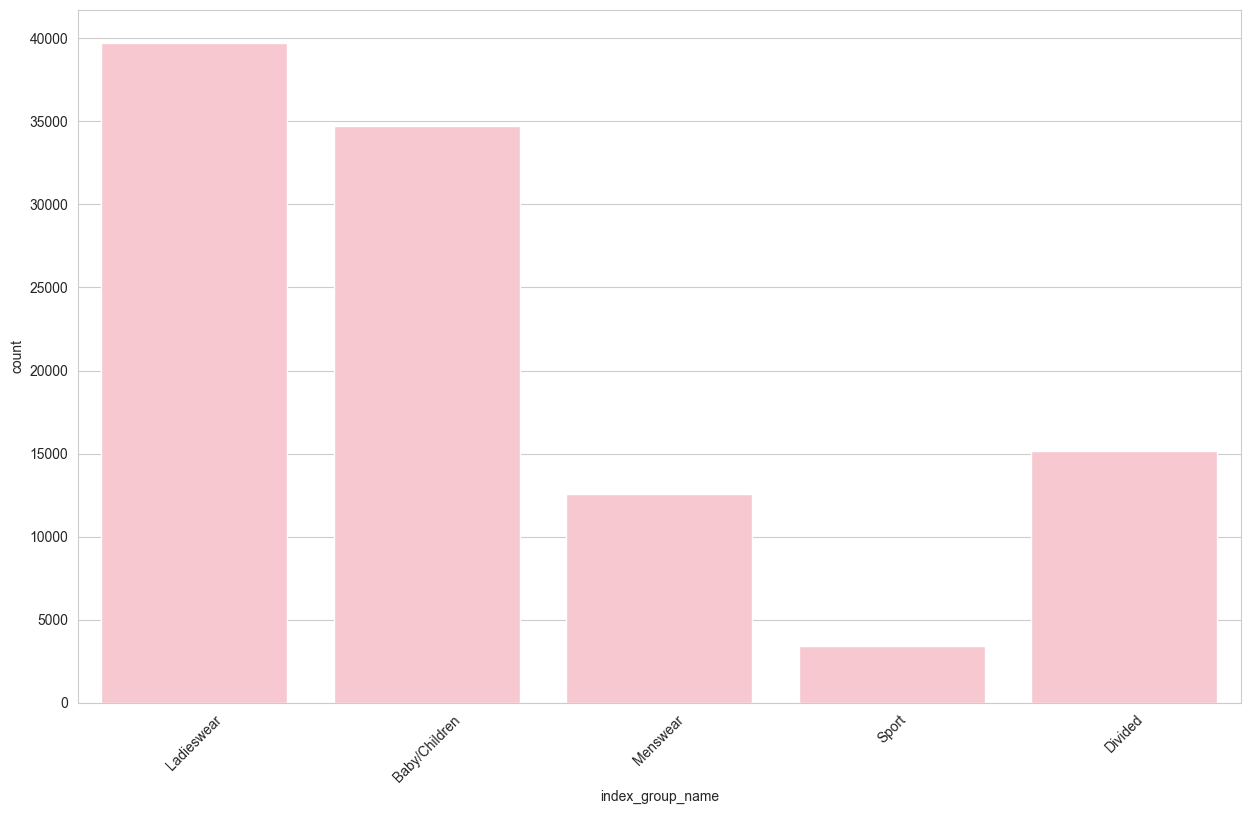

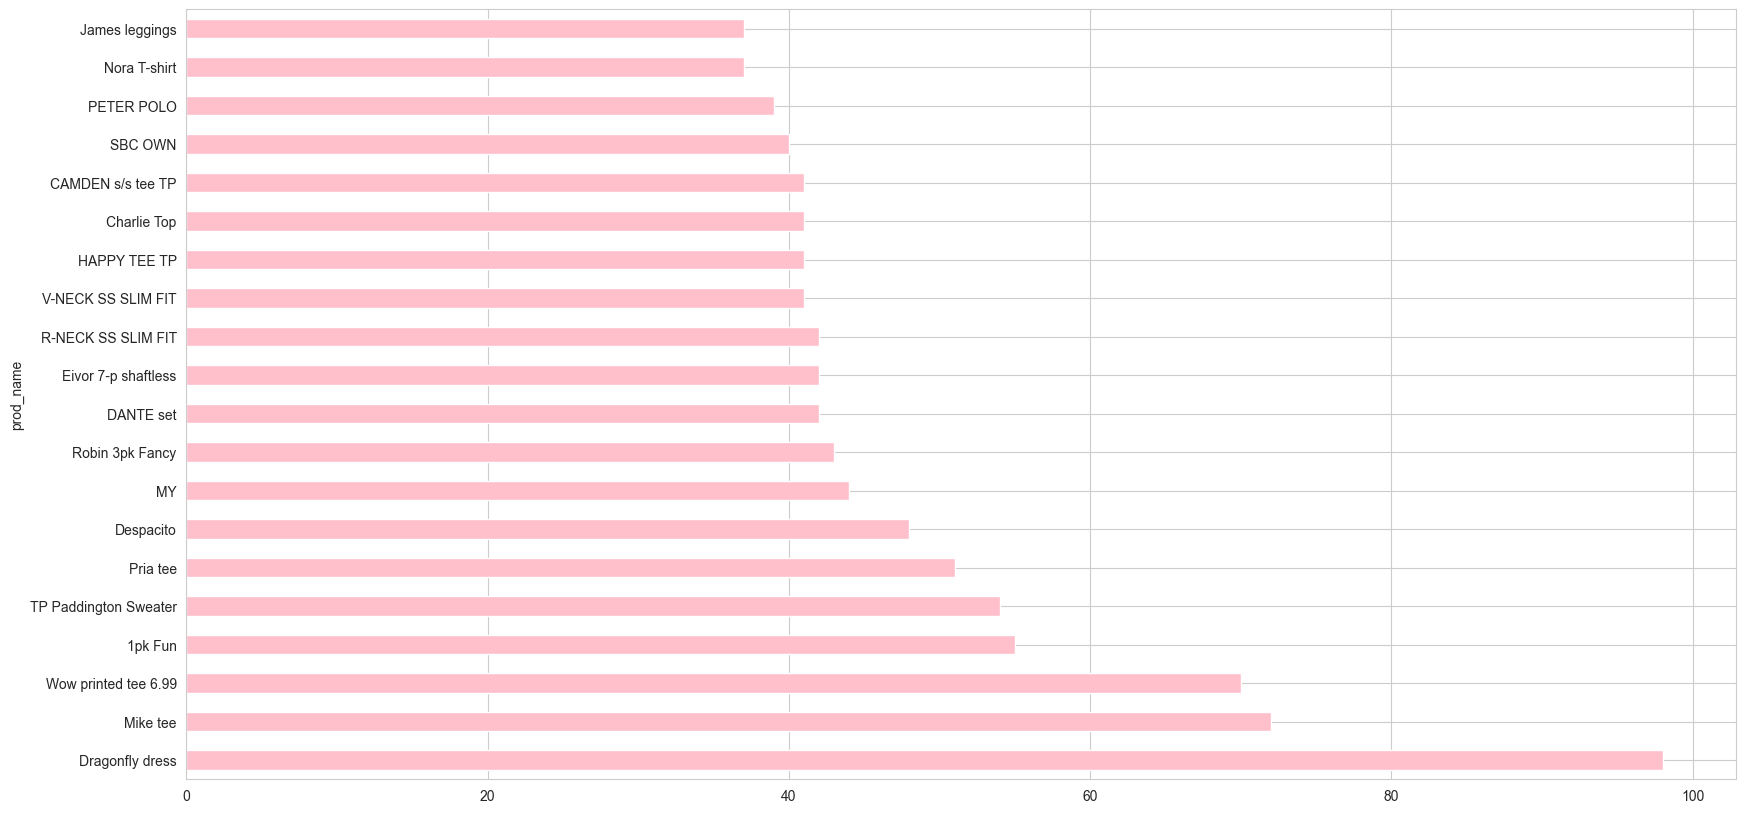

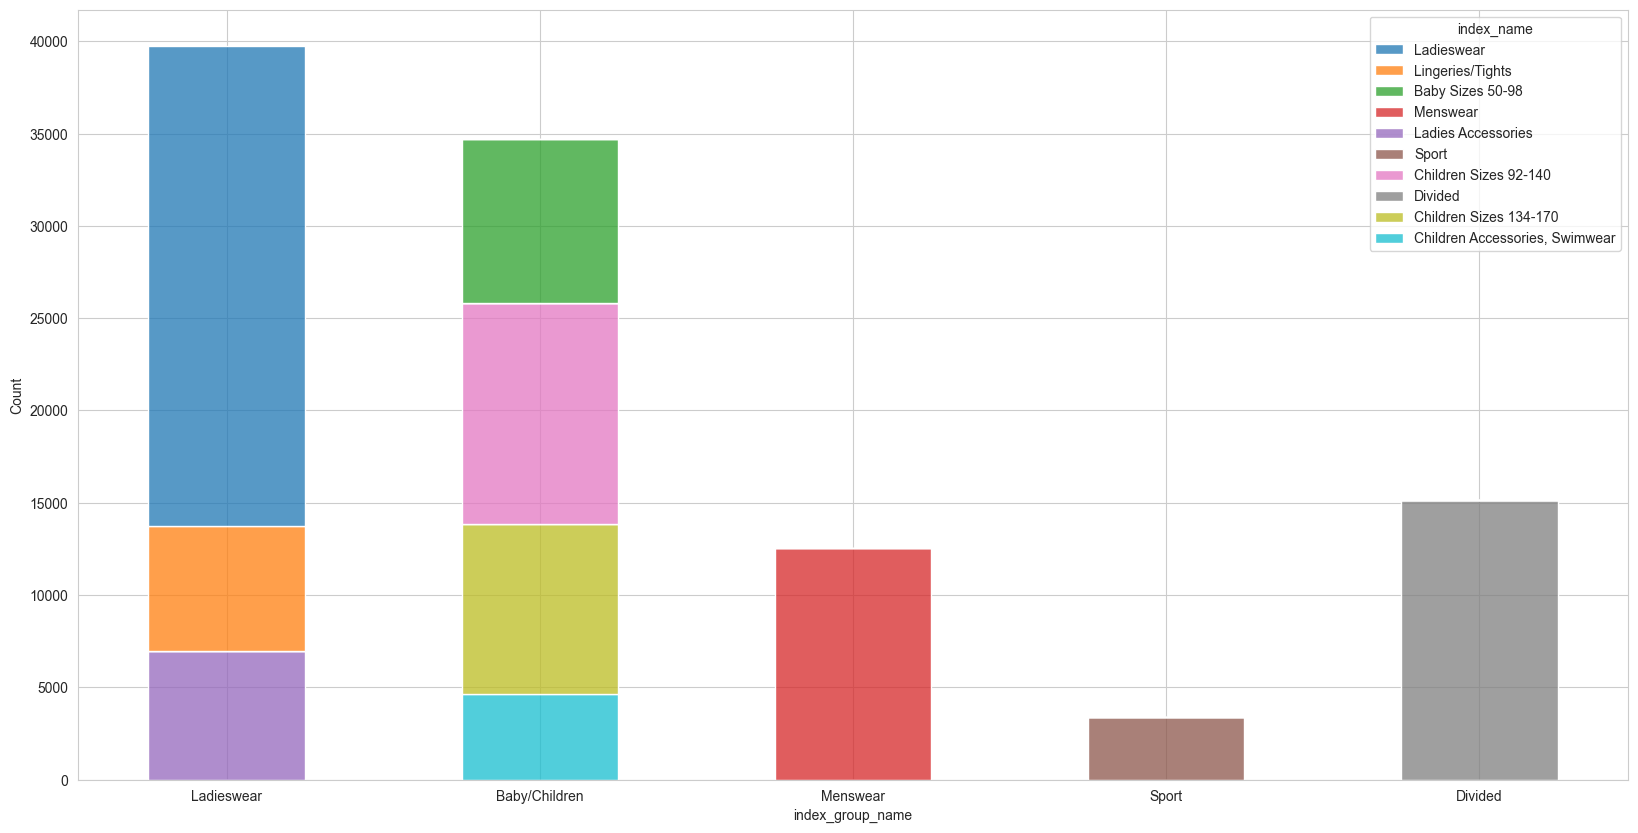

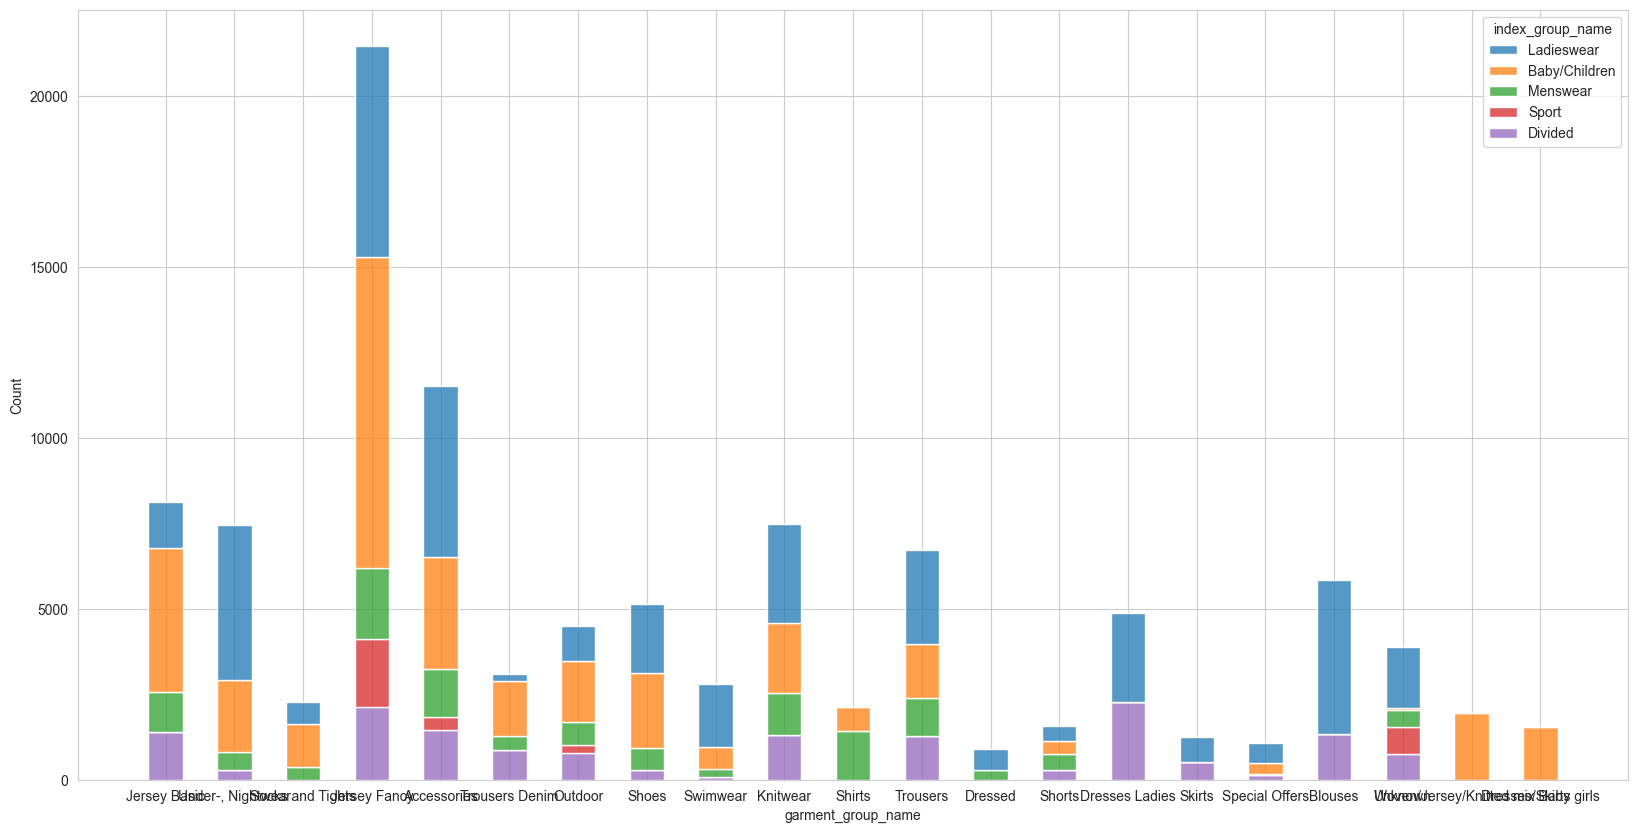

In [28]:

# Read the articles data
articles_df = pd.read_csv("articles.csv")

# Set the global figure size
global_fig_size = (20, 10)

# Function to create a count plot
def create_count_plot(data, x, figsize=global_fig_size, rotation=0):
    fig, ax = plt.subplots(figsize=figsize)
    sns.countplot(data=data, x=x, color='pink', ax=ax)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)  # Rotate x-axis labels
    plt.show()

# Function to create a stacked histogram plot
def create_stacked_hist_plot(data, x, hue, y, figsize=global_fig_size):
    fig = plt.figure(figsize=figsize)
    sns.histplot(data=data, x=x, hue=hue, y=y, multiple='stack', shrink=0.5, color='pink')
    plt.show()

# Count Plot for Perceived Colour Value Name
create_count_plot(articles_df, x='perceived_colour_value_name')

# Count Plot for Product Group Name
create_count_plot(articles_df, x='index_group_name', figsize=(15, 9), rotation=45)


# Top 20 Products in Inventory
top_20_products = articles_df['prod_name'].value_counts(ascending=False)[:20]
top_20_products.plot(kind='barh', color='pink', figsize=global_fig_size)
plt.show()

# Stacked Histogram Plot for Index Group Name by Index Name
create_stacked_hist_plot(articles_df, x='index_group_name', hue='index_name', y=None)

# Stacked Histogram Plot for Garment Group Name by Index Group Name
create_stacked_hist_plot(articles_df, x='garment_group_name', hue='index_group_name', y=None)



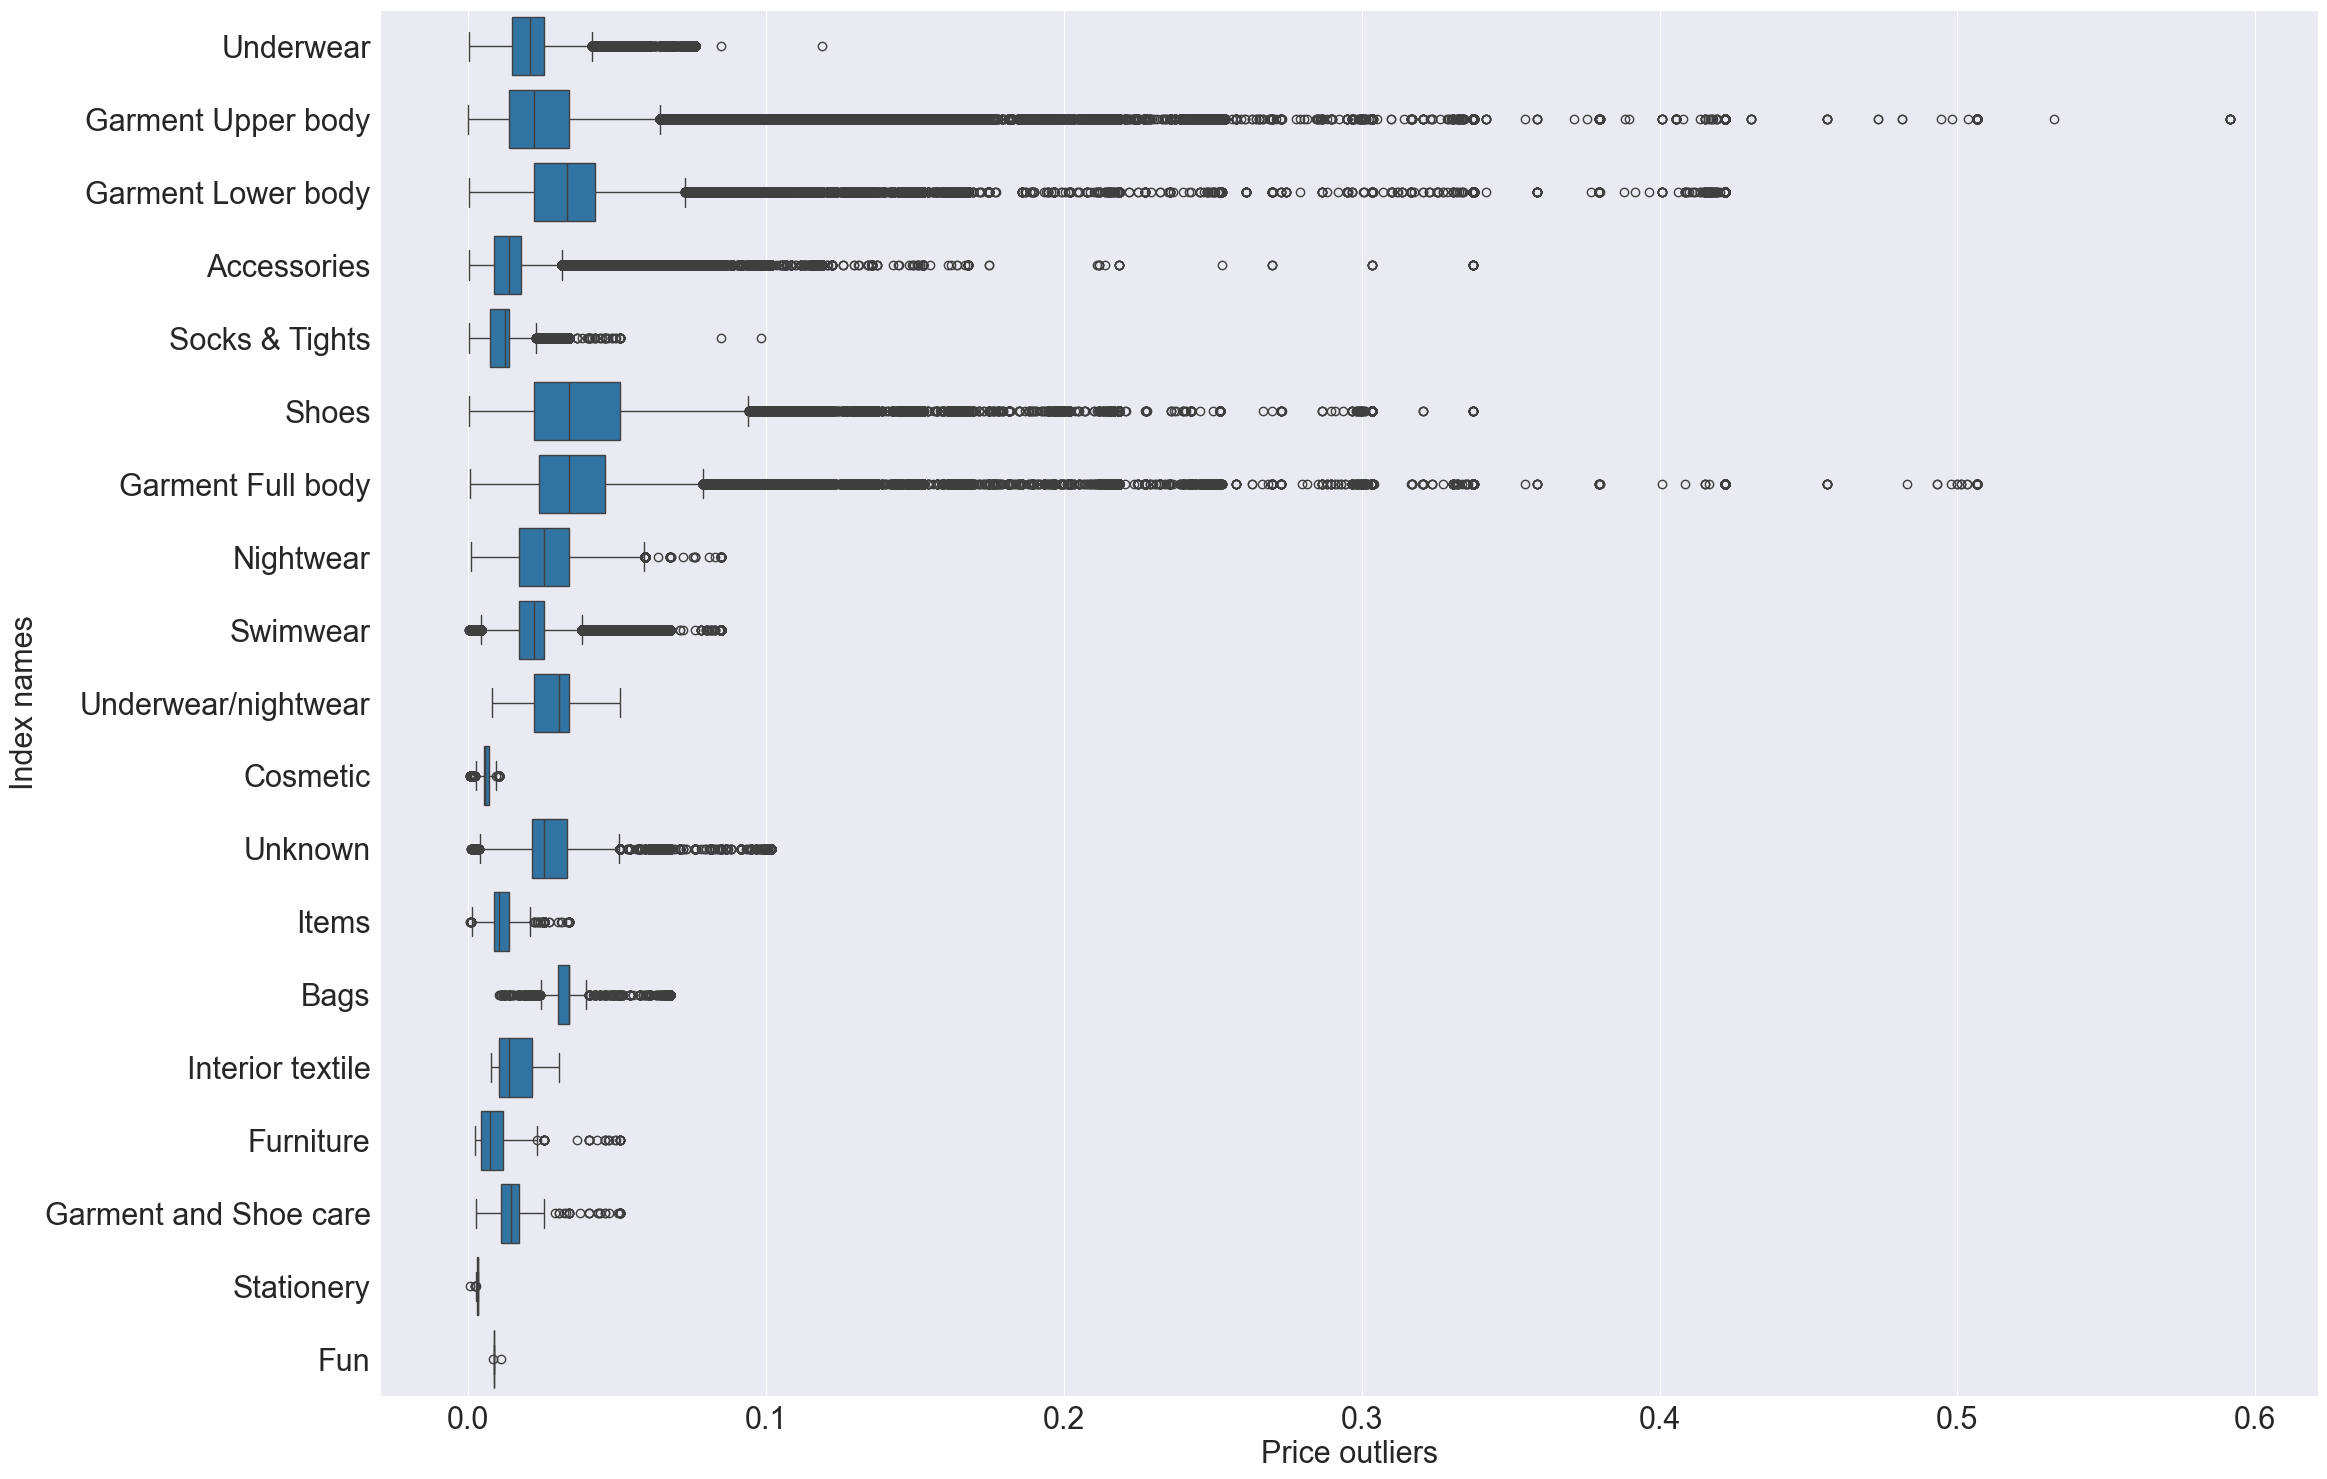

In [29]:


# Assign the DataFrame to transactions_df
transactions_df = dataframe4

# Select columns of interest from the articles DataFrame
articles_for_merge = articles_df[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

# Merge the selected columns with the transactions DataFrame
merged_data = transactions_df[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')

# Set the style to darkgrid
sns.set_style("darkgrid")

# Create a boxplot
fig, ax = plt.subplots(figsize=(25, 18))
ax = sns.boxplot(data=merged_data, x='price', y='product_group_name')

# Set labels and tick sizes
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Index names', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)

# Show the plot
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 8 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   customer_id             1371980 non-null  object  
 1   FN                      1371980 non-null  float64 
 2   Active                  1371980 non-null  float64 
 3   club_member_status      1365918 non-null  object  
 4   fashion_news_frequency  1355969 non-null  object  
 5   age                     1356119 non-null  float64 
 6   postal_code             1371980 non-null  object  
 7   age_group               1229340 non-null  category
dtypes: category(1), float64(3), object(4)
memory usage: 74.6+ MB


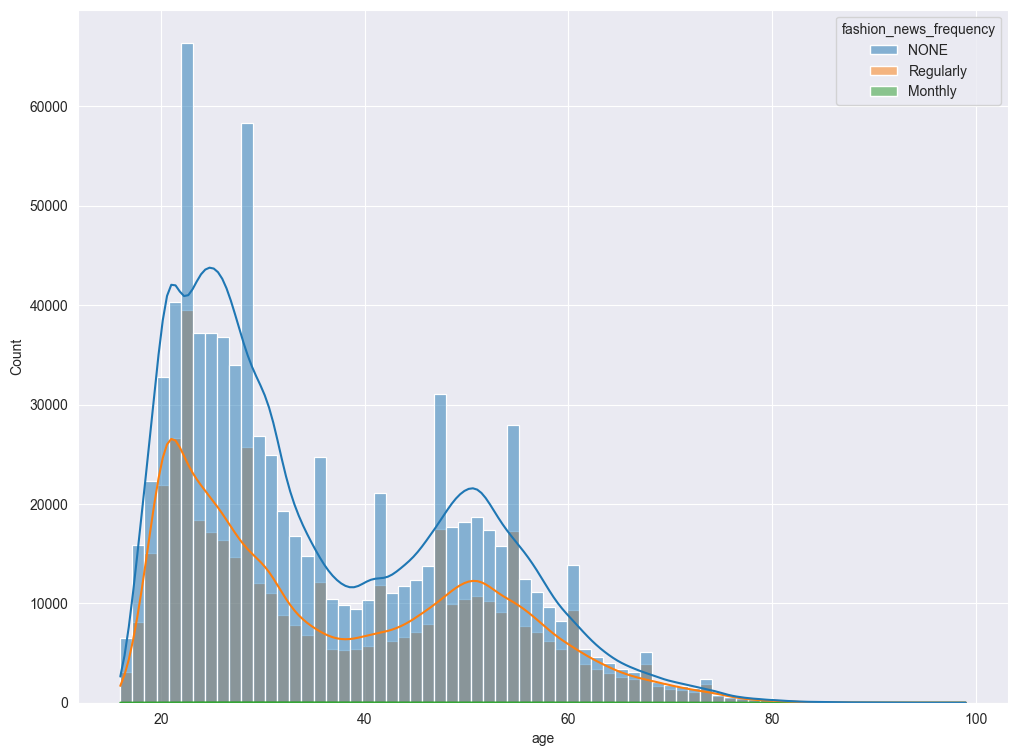

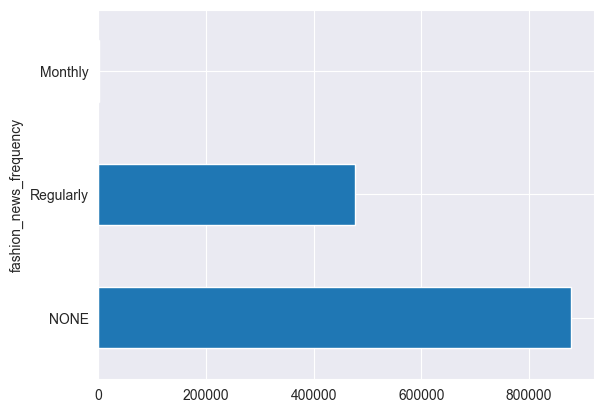

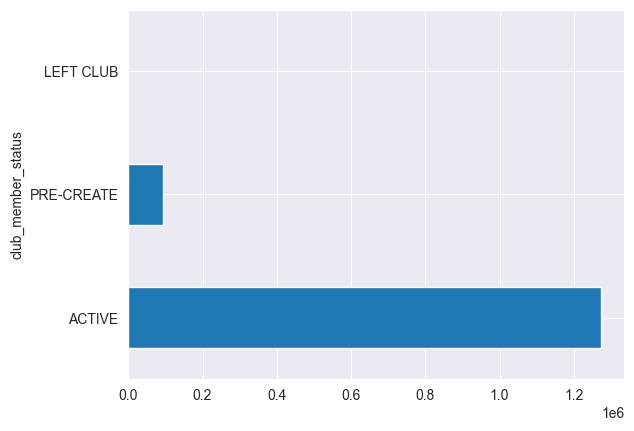

postal_code
2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c    120303
cc4ed85e30f4977dae47662ddc468cd2eec11472de6fac5ec985080fd92243c8       261
714976379549eb90aae4a71bca6c7402cc646ae7c40f6c1cb91d4b5a18623fc1       159
7c1fa3b0ec1d37ce2c3f34f63bd792f3b4494f324b6be5d1e4ba6a75456b96a7       157
5b7eb31eabebd3277de632b82267286d847fd5d44287ee150bb4206b48439145       156
                                                                     ...  
16dd7e391f305b54c01ffed87c189e33de83158d0a808d1b346222703742f638         1
5ce1c699380b3c13655347c9636043f5e64ec2538a1ee7d42dd253a584577630         1
afdedc642d01efeefec6fc8d3394724a71888ebd0ff0311eff6f34946589479d         1
4c8838d278d23029c920b9684fa4cf30a532428a445afb300eeb288685cf00e1         1
0a1a03306fb2f62164c2a439b38c0caa64b40deaae868799ccb93ac69444b79d         1
Name: count, Length: 352899, dtype: int64

In [30]:
# Customers EDA

customers_df = dataframe2
customers_df.info()
customers_df.describe()

#Customers Age Distribution
fig = plt.figure(figsize=(12, 9))
sns.histplot(customers_df, x='age', bins=70, kde=True, hue='fashion_news_frequency')
plt.show()

customers_df['fashion_news_frequency'].value_counts().plot(kind='barh')
plt.show()

customers_df['club_member_status'].value_counts().plot(kind='barh')
plt.show()

customers_df['postal_code'].value_counts(ascending=False)

In [31]:
# Almost all customers come from 2c29ae653a9282cce4151bd87643c907644e09541abc28ae87dea0d1f6603b1c this postal code


Time Series Data:
         t_dat        price  year  month  day_of_week
0   2018-09-20  1415.345847  2018      9            3
1   2018-09-21  1419.262305  2018      9            4
2   2018-09-22   530.437627  2018      9            5
3   2018-09-23  1593.783085  2018      9            6
4   2018-09-24  1407.609610  2018      9            0
..         ...          ...   ...    ...          ...
729 2020-09-18  1363.858119  2020      9            4
730 2020-09-19  1227.471305  2020      9            5
731 2020-09-20  1116.071068  2020      9            6
732 2020-09-21  1139.598051  2020      9            0
733 2020-09-22  1133.418424  2020      9            1

[734 rows x 5 columns]


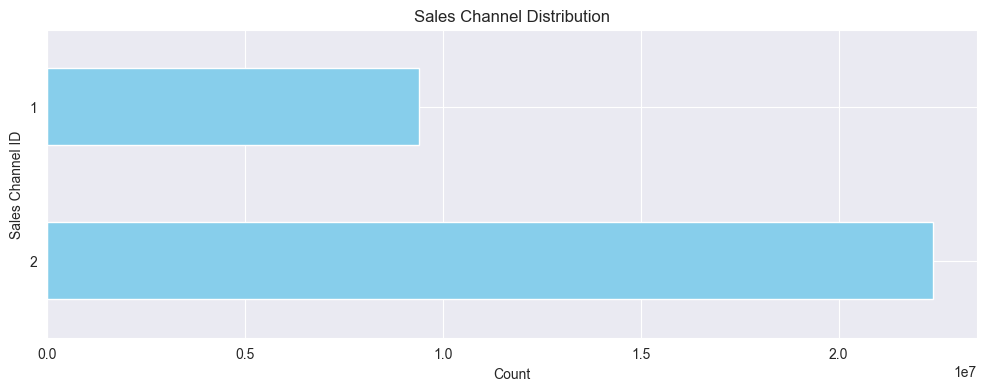

In [32]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Group transactions by date and sum the prices
time_series_df = transactions_df.groupby('t_dat')['price'].sum().reset_index()

# Extract year, month, and day of the week from the date
time_series_df['year'] = time_series_df['t_dat'].dt.year
time_series_df['month'] = time_series_df['t_dat'].dt.month
time_series_df['day_of_week'] = time_series_df['t_dat'].dt.dayofweek

# Display the time series data
print("Time Series Data:")
print(time_series_df)

# Create a line plot for sales as a time series using Plotly Express
fig = px.line(time_series_df, x='t_dat', y='price', title='Sales as Time Series')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

# Create a bar plot to show sales channel distribution
fig = plt.figure(figsize=(12, 4))
transactions_df['sales_channel_id'].value_counts().plot(kind='barh', color='skyblue')
plt.title("Sales Channel Distribution")
plt.xlabel("Count")
plt.ylabel("Sales Channel ID")
plt.show()


Top-Selling Articles Data:
        article_id  total_sales  product_code                       prod_name   
0        108775015    88.262881        108775                       Strap top  \
1        108775044    58.826169        108775                       Strap top   
2        108775051     1.070644        108775                   Strap top (1)   
3        110065001    21.108746        110065               OP T-shirt (Idro)   
4        110065002     9.812746        110065               OP T-shirt (Idro)   
...            ...          ...           ...                             ...   
104542   952267001     0.614254        952267  Heavy plain overknee tights 1p   
104543   952938001     0.432051        952938                       Elton top   
104544   953450001     0.286220        953450          5pk regular Placement1   
104545   953763001     0.766780        953763               SPORT Malaga tank   
104546   956217002     1.242186        956217                 Cartwheel dress   



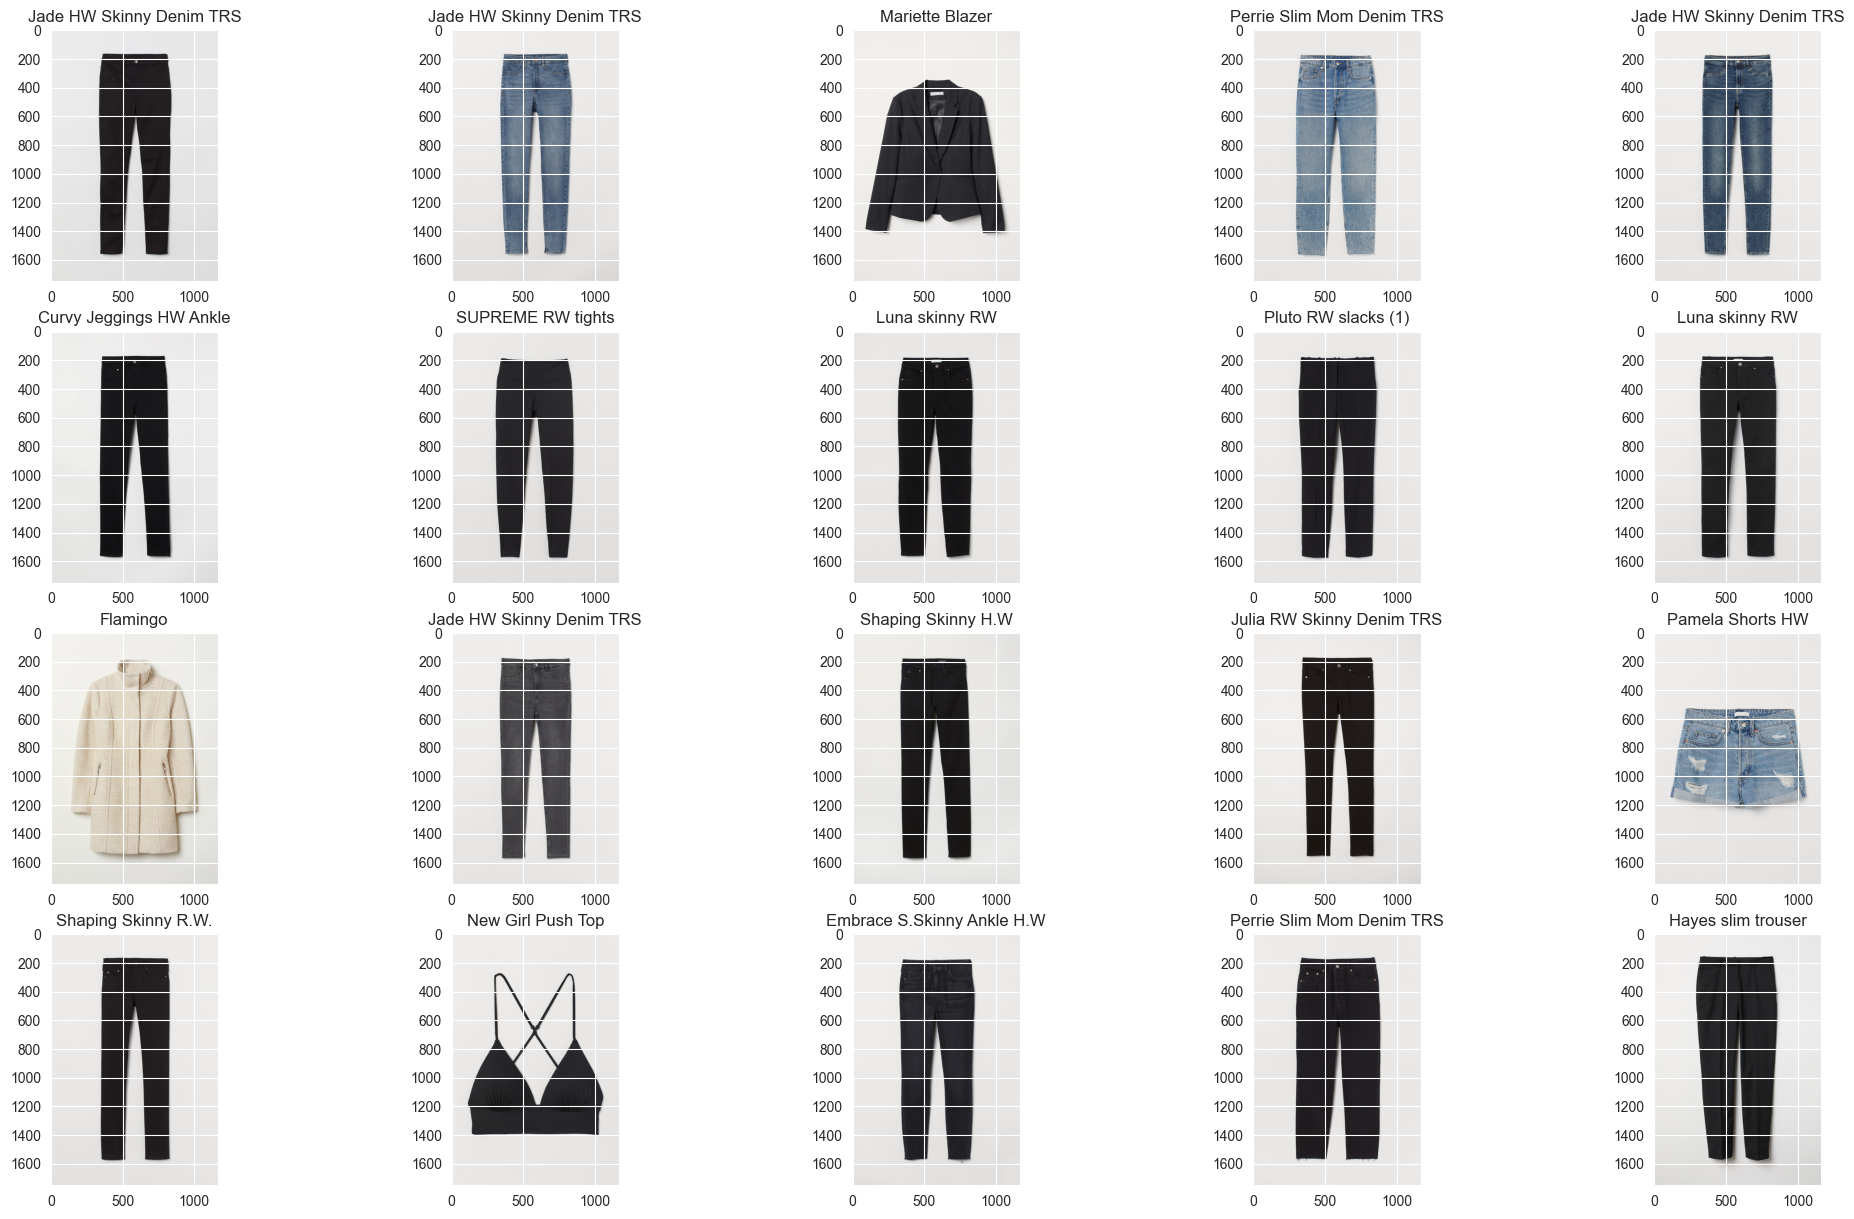

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

# Group transactions by article_id and sum the prices
prod_sales = transactions_df.groupby('article_id')['price'].sum().reset_index()

# Rename the 'price' column to 'total_sales'
prod_sales['total_sales'] = prod_sales['price']

# Drop the 'price' column
prod_sales.drop(columns=['price'], inplace=True)

# Merge prod_sales with the articles DataFrame
prod_sales = prod_sales.merge(articles_df, how='left', on='article_id')

# Display the merged DataFrame
print("Top-Selling Articles Data:")
print(prod_sales)

# Sort the DataFrame by 'total_sales' in descending order to find the top 20 articles
top_20_articles_sold = prod_sales.sort_values(by='total_sales', ascending=False).reset_index(drop=True)[:20]

# Function to plot images and product names
def plot_images(image_article_df, rows, cols):
    fig, ax = plt.subplots(rows, cols, figsize=(25, 15))
    k = 0
    for i in range(rows):
        for j in range(cols):
            article_id = image_article_df.loc[k, 'article_id']
            file_path = f"images/0{str(article_id)[:2]}/0{str(article_id)}.jpg"
            image = Image.open(file_path)
            ax[i][j].imshow(image)
            ax[i][j].set_title(image_article_df.loc[k, 'prod_name'])
            k += 1
    plt.show()

# Plot images of the top 20 articles in a grid
plot_images(top_20_articles_sold, 4, 5)


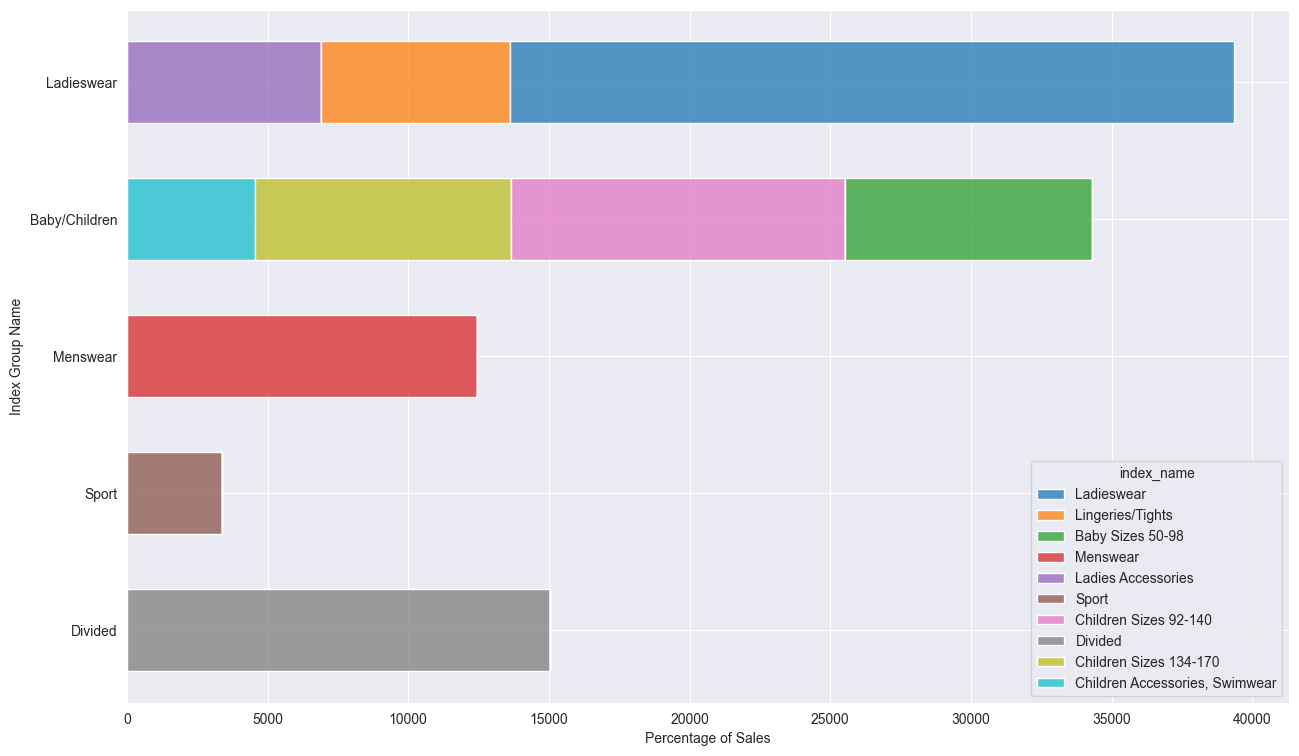

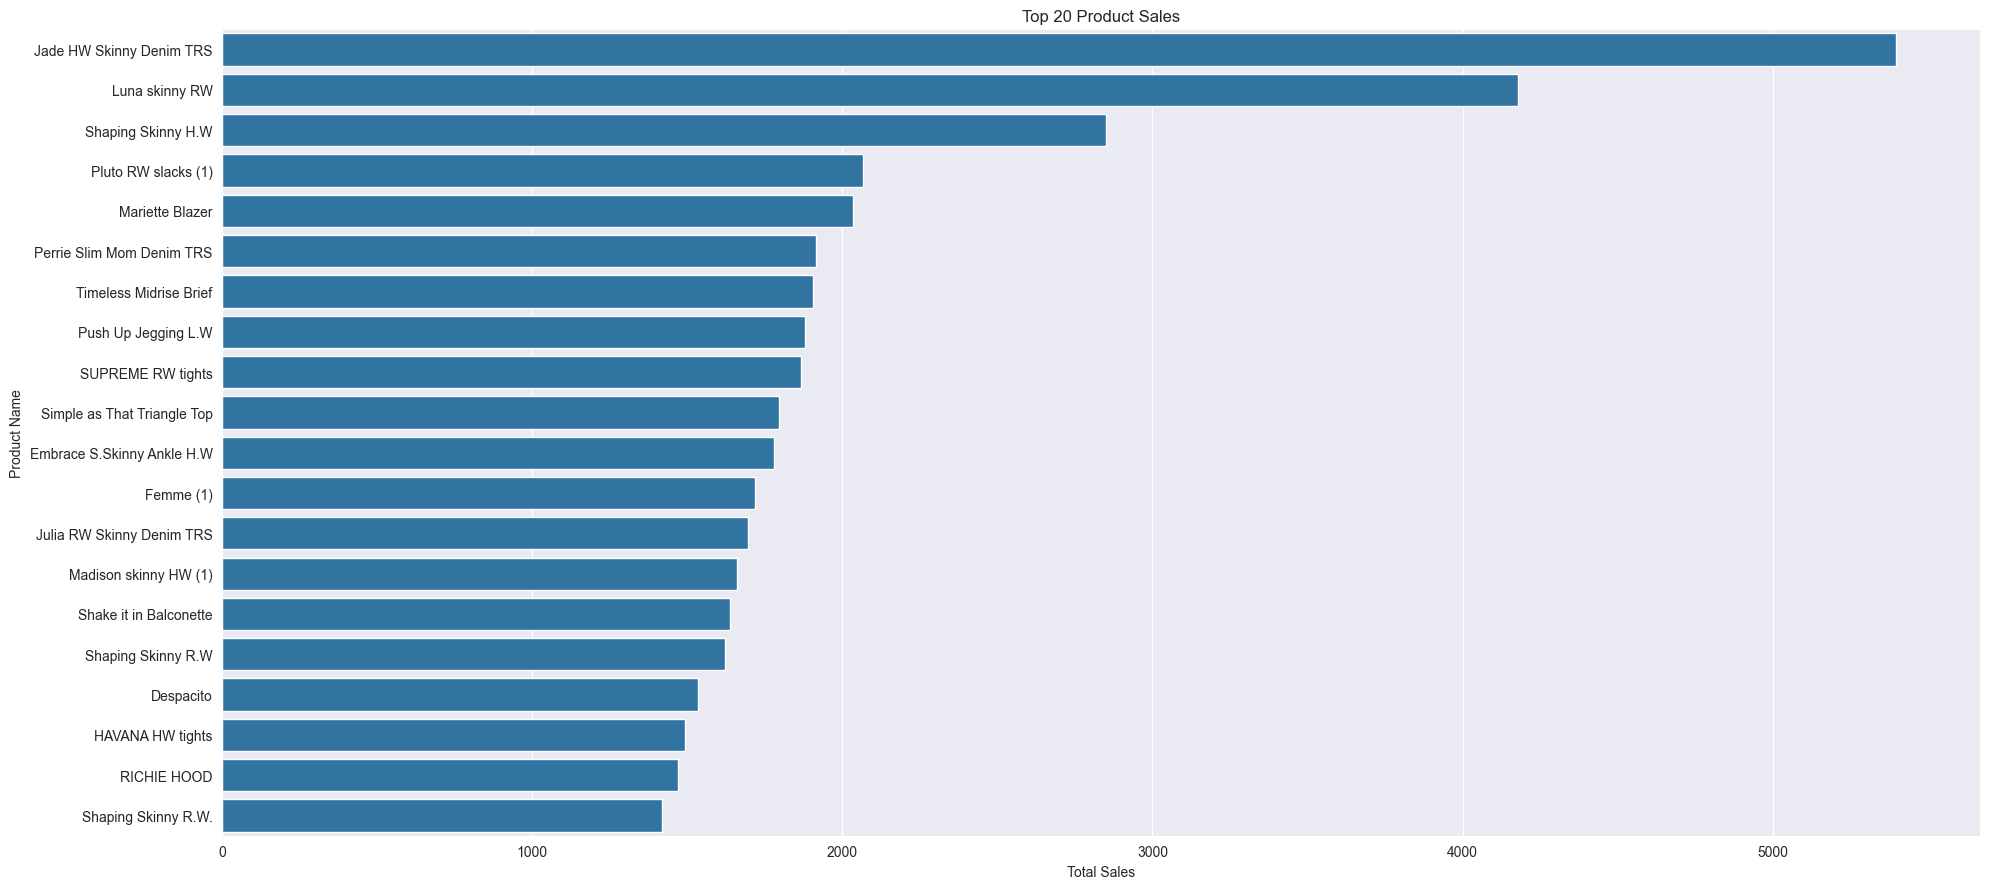

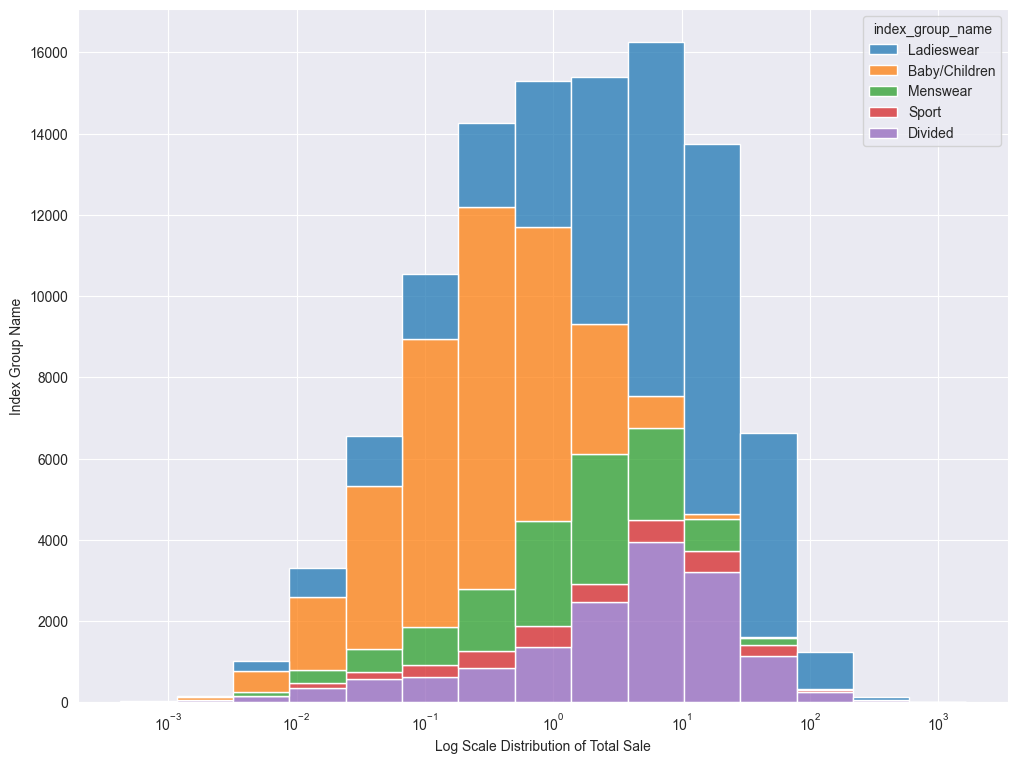

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Percentage of Sales by Index Group and Hue with Index Name
fig, ax = plt.subplots(figsize=(15, 9))
sns.histplot(data=prod_sales, y='index_group_name', hue='index_name', multiple='stack', shrink=0.6, ax=ax)
ax.set_xlabel("Percentage of Sales")
ax.set_ylabel("Index Group Name")
plt.show()

# Top 20 Product Sales
top_20_product_sales = prod_sales.groupby(['prod_name'])['total_sales'].sum().sort_values(ascending=False)[:20].reset_index()
fig, ax = plt.subplots(figsize=(20, 9))
sns.barplot(data=top_20_product_sales, y='prod_name', x='total_sales', ax=ax)
ax.set_title("Top 20 Product Sales")
ax.set_xlabel("Total Sales")
ax.set_ylabel("Product Name")
plt.tight_layout()
plt.show()

# Log Scale Distribution of Total Sale
fig, ax = plt.subplots(figsize=(12, 9))
sns.histplot(data=prod_sales, x='total_sales', hue='index_group_name', bins=15, multiple='stack', log_scale=True, ax=ax)
ax.set_xlabel("Log Scale Distribution of Total Sale")
ax.set_ylabel("Index Group Name")
plt.show()


In [35]:
transactions_byid = transactions_df.groupby('customer_id').count()


K MEANS


In [36]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

# Load Python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

# data analysis
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# progress bar
from tqdm.notebook import tqdm

# dimensionality reduction (for visualization)
#from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# from google.colab import drive
# drive.mount('/content/drive')

transactions = pd.read_csv('transactions_train.csv', delimiter=",")

articles = pd.read_csv('articles.csv')
customers = pd.read_csv('customers.csv')

transactions = transactions[:100000]

transactions = transactions[["customer_id", "article_id", "price"]]

customers = customers[["customer_id", "age"]]


articles = articles[["article_id", "prod_name", "product_type_name", "product_group_name",
                     "department_name", "index_name", "index_group_name",
                     "section_name", "garment_group_name"]]

temp = pd.merge(transactions, articles, on="article_id", how='inner')
temp = pd.merge(temp, customers, on="customer_id", how='inner')

display(temp[temp.isnull().any(axis=1)])
temp = temp.dropna()

import gc
gc.collect()


,customer_id,article_id,price,prod_name,product_type_name,product_group_name,department_name,index_name,index_group_name,section_name,garment_group_name,age
709,577bc5bfb2a8d280292182def807f6359a477a20c434bf...,685687003,0.016932,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Campaigns,Ladieswear,Ladieswear,Womens Everyday Collection,Special Offers,NaN
710,577bc5bfb2a8d280292182def807f6359a477a20c434bf...,685687004,0.016932,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Campaigns,Ladieswear,Ladieswear,Womens Everyday Collection,Special Offers,NaN
711,577bc5bfb2a8d280292182def807f6359a477a20c434bf...,680374003,0.032186,Liddy,Blouse,Garment Upper body,Blouse,Ladieswear,Ladieswear,Womens Everyday Collection,Blouses,NaN
712,577bc5bfb2a8d280292182def807f6359a477a20c434bf...,617534007,0.011847,Lova Linen v neck,T-shirt,Garment Upper body,Jersey,Ladieswear,Ladieswear,Womens Casual,Jersey Fancy,NaN
713,577bc5bfb2a8d280292182def807f6359a477a20c434bf...,684588006,0.025407,Yen.,Blouse,Garment Upper body,Blouse,Ladieswear,Ladieswear,Womens Everyday Collection,Blouses,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
99636,63f705bcaf510c79143cec4bdd09023686bf15e88aae4d...,525111001,0.003373,Classic Clubba glasses,Other accessories,Accessories,Sunglasses,Ladies Accessories,Ladieswear,Womens Small accessories,Accessories,NaN
99709,79ac70230bc27fc3737976236bde7fb384b2b2bdb05f69...,682623002,0.016932,Bibi 4-p kneehigh,Socks,Socks & Tights,Kids Girl S&T,Children Sizes 92-140,Baby/Children,Girls Underwear & Basics,Socks and Tights,NaN
99710,79ac70230bc27fc3737976236bde7fb384b2b2bdb05f69...,682623002,0.016932,Bibi 4-p kneehigh,Socks,Socks & Tights,Kids Girl S&T,Children Sizes 92-140,Baby/Children,Girls Underwear & Basics,Socks and Tights,NaN
99832,a567cceed7bd61f7ed881820fd6ccf13b1ec9dc5ddc983...,667928001,0.042356,LOGG Vimmerby,Top,Garment Upper body,Woven top,Ladieswear,Ladieswear,H&M+,Blouses,NaN


28684

In [37]:
# find highest level of groups
for col in ["prod_name", "product_type_name", "product_group_name",
            "department_name", "index_name", "index_group_name",
            "section_name", "garment_group_name"]:
    print(f"{col}\t>> {temp[col].nunique()} number of unique categories.")

prod_name	>> 8915 number of unique categories.
product_type_name	>> 95 number of unique categories.
product_group_name	>> 14 number of unique categories.
department_name	>> 225 number of unique categories.
index_name	>> 10 number of unique categories.
index_group_name	>> 5 number of unique categories.
section_name	>> 55 number of unique categories.
garment_group_name	>> 21 number of unique categories.


In [38]:
# define customer-article matrix
ca_matrix = pd.crosstab(index=temp.customer_id, columns=temp.index_group_name)
ca_matrix

index_group_name,Baby/Children,Divided,Ladieswear,Menswear,Sport
customer_id,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0,2,1,0,0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,0,2,0,0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0,2,3,0,0
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0,3,1,0,0
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0,0,1,0,1
...,...,...,...,...,...
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0,0,5,0,0
fff4b145d7469e023b147b0f8375c565b1be43944987792153ccc0af41466cf3,0,1,2,0,0
fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b46e8080849008fe17c,0,0,2,0,4


In [39]:
# Get average prices they've been bought.
prices = temp.groupby(["customer_id"])["price"].mean()
prices

customer_id
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa    0.042356
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318    0.040661
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2    0.017271
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358    0.029644
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c    0.016085
                                                                      ...   
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee    0.021678
fff4b145d7469e023b147b0f8375c565b1be43944987792153ccc0af41466cf3    0.015802
fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b46e8080849008fe17c    0.037554
fff969b13a1c848d53ae3f08f111bfebcdcf6cd27e3815235db95f1e99524c79    0.020322
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264    0.042356
Name: price, Length: 28138, dtype: float64

In [40]:
# get customer ages
ages = temp.groupby(["customer_id"])["age"].mean()
ages

customer_id
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa    25.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318    24.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2    32.0
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358    51.0
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c    51.0
                                                                    ... 
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee    33.0
fff4b145d7469e023b147b0f8375c565b1be43944987792153ccc0af41466cf3    56.0
fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b46e8080849008fe17c    47.0
fff969b13a1c848d53ae3f08f111bfebcdcf6cd27e3815235db95f1e99524c79    52.0
ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1778d0116cffd259264    21.0
Name: age, Length: 28138, dtype: float64

In [41]:
# merge them into one table
train = pd.merge(ca_matrix, prices, on="customer_id", how="left")
train = pd.merge(train, ages, on="customer_id", how="left")
train

,Baby/Children,Divided,Ladieswear,Menswear,Sport,price,age
customer_id,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0,2,1,0,0,0.042356,25.0
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0,0,2,0,0,0.040661,24.0
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0,2,3,0,0,0.017271,32.0
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0,3,1,0,0,0.029644,51.0
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0,0,1,0,1,0.016085,51.0
...,...,...,...,...,...,...,...
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0,0,5,0,0,0.021678,33.0
fff4b145d7469e023b147b0f8375c565b1be43944987792153ccc0af41466cf3,0,1,2,0,0,0.015802,56.0
fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b46e8080849008fe17c,0,0,2,0,4,0.037554,47.0


In [42]:
from sklearn.preprocessing import MinMaxScaler

scaled = MinMaxScaler().fit_transform(train)
X = pd.DataFrame(data=scaled, columns=train.columns, index=train.index)
X

,Baby/Children,Divided,Ladieswear,Menswear,Sport,price,age
customer_id,,,,,,,
0000423b00ade91418cceaf3b26c6af3dd342b51fd051eec9c12fb36984420fa,0.0,0.033333,0.019231,0.0,0.000000,0.070273,0.098765
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,0.0,0.000000,0.038462,0.0,0.000000,0.067403,0.086420
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,0.0,0.033333,0.057692,0.0,0.000000,0.027805,0.185185
0003abe64294e66a6310c3436fa9e5b754cc5603deef4f26fc8ab8d043af9358,0.0,0.050000,0.019231,0.0,0.000000,0.048752,0.419753
0004068f54dbe1c7054b23c615edc5f733a508ecc54930bf323209f20410898c,0.0,0.000000,0.019231,0.0,0.038462,0.025796,0.419753
...,...,...,...,...,...,...,...
fff3e75605ec575be9b95eda1e6557299e81bba12668d750c0e973528e48b7ee,0.0,0.000000,0.096154,0.0,0.000000,0.035265,0.197531
fff4b145d7469e023b147b0f8375c565b1be43944987792153ccc0af41466cf3,0.0,0.016667,0.038462,0.0,0.000000,0.025318,0.481481
fff627c97a69e53afb4a2b49a3ebf7fa06660afaac959b46e8080849008fe17c,0.0,0.000000,0.038462,0.0,0.153846,0.062143,0.370370


In [43]:
# we segment 28,317 users into  groups by using K-means clustering.

model = KMeans()
preds_kmeans = model.fit_predict(X)
print("SSE : ", model.inertia_)
print("Silhouette Score : %.4f" % silhouette_score(X, preds_kmeans))
score = silhouette_score(X, preds_kmeans)
print(preds_kmeans)

SSE :  173.42574126597748
Silhouette Score : 0.2375
[0 0 6 ... 3 1 0]


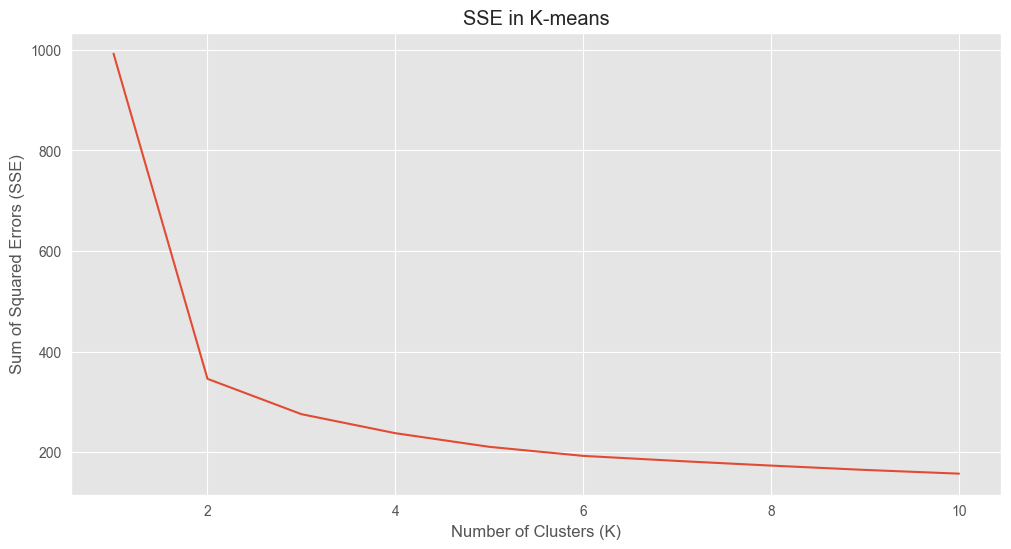

In [44]:
# SSE
from sklearn.cluster import KMeans
sses = []
clusters_range = range(1, 11)

for N in clusters_range:
    kmeans = KMeans(n_clusters=N, random_state=42)
    kmeans.fit(X)
    sses.append(kmeans.inertia_)

# Plotting SSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.title("SSE in K-means")
sns.lineplot(x=clusters_range, y=sses)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


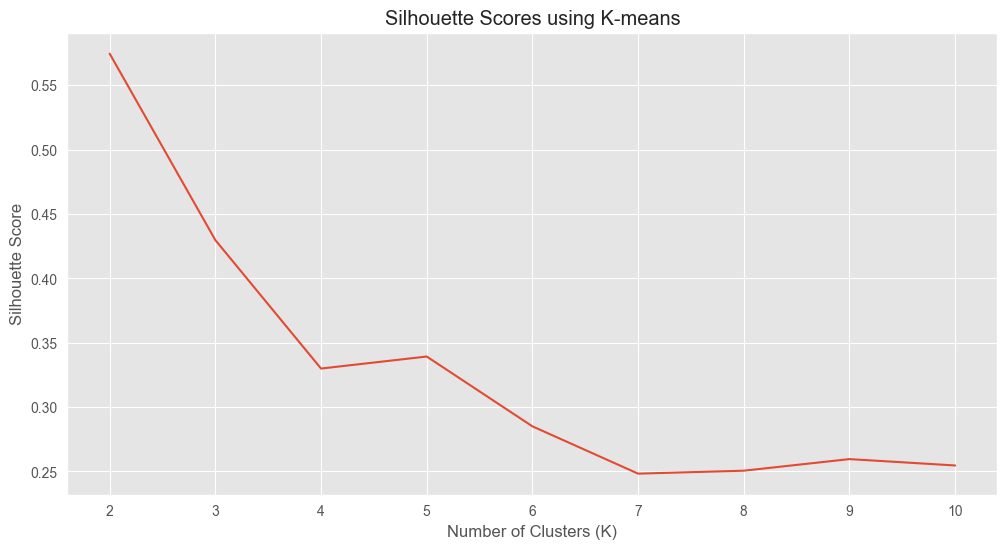

In [45]:
# Silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# List to store Silhouette scores
scores = []
# Range of clusters 
clusters_range = range(2, 11)

for N in clusters_range:
    kmeans = KMeans(n_clusters=N, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    scores.append(silhouette_avg)

# Plotting Silhouette scores
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.title("Silhouette Scores using K-means")
sns.lineplot(x=clusters_range, y=scores)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()


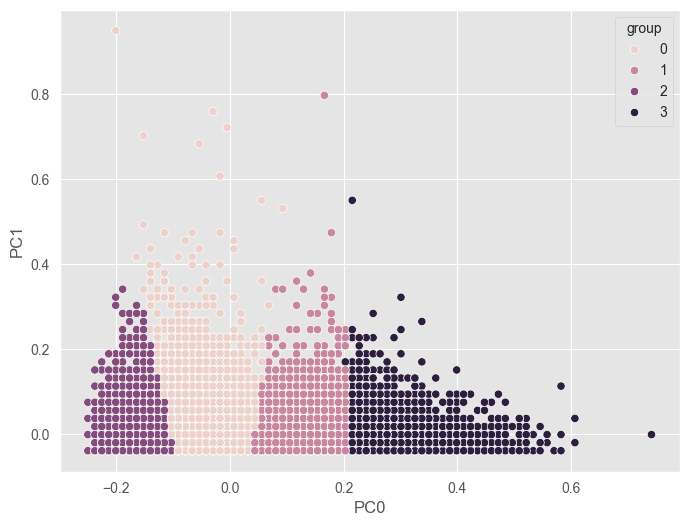

In [46]:
from sklearn.decomposition import MiniBatchSparsePCA

#pca = PCA(n_components=2)
#tsne = TSNE(n_components=2, perplexity=50, random_state=42)
#svd = TruncatedSVD(n_components=2, )
pca = MiniBatchSparsePCA(n_components=2, batch_size=100000, random_state=42)

X_reduced = pca.fit_transform(X)
#X_reduced = tsne.fit_transform(X)
pca_df = pd.DataFrame(data=X_reduced,
                     columns=[f"PC{i}" for i in range(X_reduced.shape[1])])

# tsne_df = pd.DataFrame(data=X_reduced,
#                        columns=[f"dim{i}" for i in range(1, X_reduced.shape[1]+1)])


# finalize cluster model
# with sse
result_sse = KMeans(n_clusters=4).fit_predict(X)

# with silhouette
#result_silhouette = KMeans(n_clusters=2).fit_transform(X)

pca_df['group'] = result_sse
#tsne_df['group'] = result_sse

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC0", y="PC1", hue="group")
#sns.scatterplot(data=tsne_df, x="dim1", y="dim2", hue="group")
plt.show()

DBSCAN


In [47]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

model = DBSCAN(eps=0.5, min_samples=5)  # Define the epsilon (eps) and min_samples parameters
preds_dbscan = model.fit_predict(X)

silhouette = silhouette_score(X, preds_dbscan)
if silhouette != -1:  # DBSCAN may return -1 for noise points, which can't be used in silhouette score
    print("Silhouette Score: %.4f" % silhouette)  # Silhouette Score
else:
    print("No valid silhouette score due to noise points.")


Silhouette Score: 0.8202


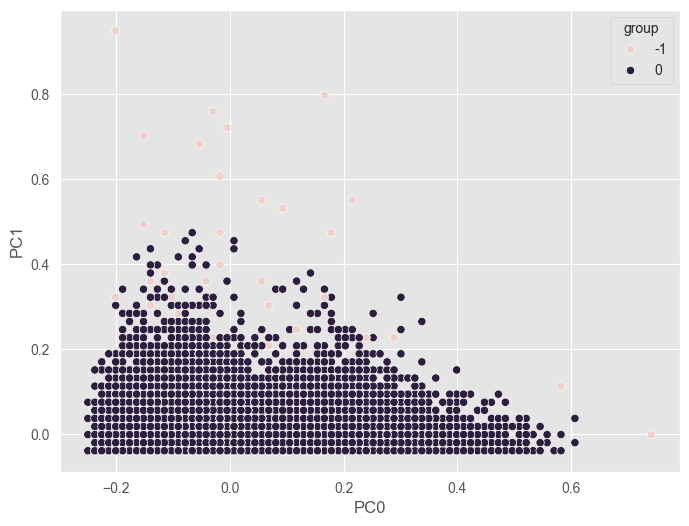

In [48]:
from sklearn.decomposition import MiniBatchSparsePCA
from sklearn.cluster import DBSCAN

pca = MiniBatchSparsePCA(n_components=2, batch_size=100000, random_state=42)
X_reduced = pca.fit_transform(X)
pca_df = pd.DataFrame(data=X_reduced, columns=[f"PC{i}" for i in range(X_reduced.shape[1])])

dbscan_model = DBSCAN(eps=0.1, min_samples=5)  # Define DBSCAN model with chosen hyperparameters
result_dbscan = dbscan_model.fit_predict(X)

pca_df['group'] = result_dbscan

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC0", y="PC1", hue="group")
plt.show()


Logistic Regression

In [49]:
unique_values = dataframe2['fashion_news_frequency'].unique()
replace_dict = {'NONE': '0', 'nan': '0', 'None': '0', 'Monthly': '1', 'Regularly': '2'}
dataframe2['fashion_news_frequency'].replace(replace_dict, inplace=True)
dataframe2['fashion_news_frequency'].fillna('0', inplace=True)
unique_values = dataframe2['fashion_news_frequency'].unique()
dataframe2['fashion_news_frequency'] = dataframe2['fashion_news_frequency'].astype(int)
unique_values = dataframe2['fashion_news_frequency'].unique()

dataframe2['age'].fillna(0, inplace=True)
unique_values = dataframe2['age'].unique()
dataframe2['age'] = dataframe2['age'].astype(int)
unique_values = dataframe2['age'].unique()
dataframe2['club_member_status'].fillna(0, inplace=True)
replace_dict = {'ACTIVE': '2', 'PRE-CREATE': '1', 'LEFT CLUB': '0'}
dataframe2['club_member_status'].replace(replace_dict, inplace=True)
dataframe2['club_member_status'] = dataframe2['club_member_status'].astype(int)
unique_values = dataframe2['club_member_status'].unique()

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


features = dataframe2[['age', 'fashion_news_frequency']]


target = dataframe2['club_member_status']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = LogisticRegression()

model.fit(X_train, y_train)


predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1308
           1       0.00      0.00      0.00     18414
           2       0.93      1.00      0.96    254674

    accuracy                           0.93    274396
   macro avg       0.31      0.33      0.32    274396
weighted avg       0.86      0.93      0.89    274396



In [51]:
import pickle

filename = "logistic_regression_model.sav"
pickle.dump(model, open(filename, 'wb'))


RANDOM FOREST

In [52]:
from sklearn.ensemble import RandomForestClassifier

features = dataframe2[['age', 'fashion_news_frequency']]


target = dataframe2['club_member_status']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42)


model.fit(X_train, y_train)

predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1308
           1       0.49      0.08      0.14     18414
           2       0.93      1.00      0.96    254674

    accuracy                           0.93    274396
   macro avg       0.48      0.36      0.37    274396
weighted avg       0.90      0.93      0.90    274396



In [53]:
import pickle

filename = "random_forest_model.sav"
pickle.dump(model, open(filename, 'wb'))

NAIVE BAYES


In [54]:
from sklearn.naive_bayes import GaussianNB


features = dataframe2[['age', 'fashion_news_frequency']]

target = dataframe2['club_member_status']


X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


model = GaussianNB()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1308
           1       0.10      0.00      0.00     18414
           2       0.93      1.00      0.96    254674

    accuracy                           0.93    274396
   macro avg       0.34      0.33      0.32    274396
weighted avg       0.87      0.93      0.89    274396



In [55]:
import pickle

filename = "naive_bayes_model.sav"
pickle.dump(model, open(filename, 'wb'))

Multi Layer Perceptron

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

customer_data = dataframe2
transaction_data = dataframe4
data = pd.merge(customer_data, transaction_data, on='customer_id')


features = ['FN', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'price']
target = 'sales_channel_id'

X = data[features]
y = data[target]


numerical_features = ['age', 'price']
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])


categorical_features = ['FN', 'Active', 'club_member_status', 'fashion_news_frequency']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', MLPClassifier(hidden_layer_sizes=(64, 32),
                                                     activation='relu',
                                                     random_state=42,
                                                     max_iter=300))])


model.fit(X_train, y_train)


predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

ValueError: 'fill_value'=missing is invalid. Expected a numerical value when imputing numerical data

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
report = classification_report(y_test, predictions)
cf = confusion_matrix(y_test, predictions)
print(accuracy)
print(report)
print(cf)


0.7170624749809875
              precision    recall  f1-score   support

           1       0.63      0.11      0.18   1881477
           2       0.72      0.97      0.83   4476188

    accuracy                           0.72   6357665
   macro avg       0.67      0.54      0.51   6357665
weighted avg       0.69      0.72      0.64   6357665

[[ 203228 1678249]
 [ 120573 4355615]]


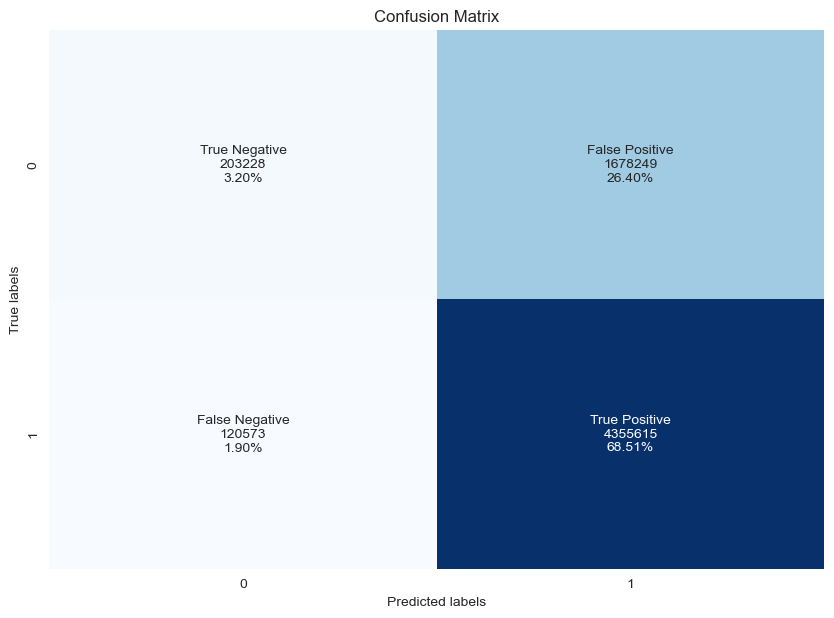

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


confusion_matrix = np.array(cf)
group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
group_counts = [f"{value}" for value in confusion_matrix.flatten()]
group_percentages = [f"{value:.2%}" for value in confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


Cosine Similarity

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd


articles_df = pd.read_csv("articles.csv")


vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', min_df=0.01, max_df=0.7)
tfidf_matrix = vectorizer.fit_transform(articles_df['detail_desc'].dropna())


def batch_cosine_similarity(matrix, batch_size=100):
    cosine_sim = np.zeros((matrix.shape[0], matrix.shape[0]))

    for start in range(0, matrix.shape[0], batch_size):
        end = start + batch_size
        batch_sim = cosine_similarity(matrix[start:end], matrix)
        cosine_sim[start:end, :] = batch_sim

    return cosine_sim


cosine_sim = batch_cosine_similarity(tfidf_matrix)

print("Cosine Similarity Matrix (first 5 articles):")
print(cosine_sim[:5, :5])

K Nearest Neighbors Algorithm

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

# Merge the datasets on 'customer_id'
merged_df = pd.merge(customers_df, transactions_df, on='customer_id')

# Preprocess the data
# Selecting features and target variable
features = ['age', 'FN', 'Active', 'club_member_status', 'fashion_news_frequency'] 
target = 'sales_channel_id'

X = merged_df[features]
y = merged_df[target]

# Handling missing values and categorical variables
numerical_features = ['age']
categorical_features = ['FN', 'Active', 'club_member_status', 'fashion_news_frequency']

# Building transformers for preprocessing
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Use a subset of the data for faster performance
# X_train, _, y_train, _ = train_test_split(X_train, y_train, test_size=0.8, random_state=42)

# Create a KNN pipeline with optimized parameters
knn_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', KNeighborsClassifier(n_neighbors=5, leaf_size=30, n_jobs=-1))])

# Train the KNN model
knn_pipeline.fit(X_train, y_train)

# Predictions and evaluation
predictions = knn_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)

NameError: name 'customers_df' is not defined